## Imports

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib as plt

## OG Dataframe

In [2]:
titanic_data = pd.read_csv("train.csv")
titanic_data_test = pd.read_csv("test.csv")
titanic_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Test Dataframe

In [3]:
titanic_data_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## Features

In [4]:
titanic_features = ['HomePlanet','CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

#### #https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

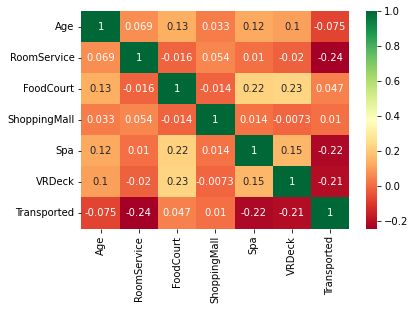

In [5]:

corr = titanic_data.corr()
top_corr = corr.index
heatmap=sns.heatmap(titanic_data[top_corr].corr(),annot=True,cmap="RdYlGn")

## Copy so that normal df isnt affected

In [6]:
titanic_copy = titanic_data.copy()
dropped_titanic_copy = titanic_data.drop(['Cabin','Name','Destination'], axis = 1)

## CryoSleep

In [7]:
dropped_titanic_copy['CryoSleep'] = dropped_titanic_copy['CryoSleep'].fillna(False)

In [8]:
dropped_titanic_copy['CryoSleep'] = dropped_titanic_copy['CryoSleep'].astype(int)  

## VIP

In [9]:
dropped_titanic_copy['VIP'] = dropped_titanic_copy['VIP'].fillna(False)

## Money columns

In [10]:
dropped_titanic_copy['RoomService'] = dropped_titanic_copy['RoomService'].fillna(0.0)
dropped_titanic_copy['FoodCourt'] = dropped_titanic_copy['FoodCourt'].fillna(0.0)
dropped_titanic_copy['ShoppingMall'] = dropped_titanic_copy['ShoppingMall'].fillna(0.0)
dropped_titanic_copy['Spa'] = dropped_titanic_copy['Spa'].fillna(0.0)
dropped_titanic_copy['VRDeck'] = dropped_titanic_copy['VRDeck'].fillna(0.0)

## Age

In [11]:
imputer = SimpleImputer()
dropped_titanic_copy["Age"] = imputer.fit_transform(dropped_titanic_copy[["Age"]]).ravel()
dropped_titanic_copy["Age"] = imputer.transform(dropped_titanic_copy[["Age"]]).ravel()

## HomePlanet

In [12]:
dropped_titanic_copy = dropped_titanic_copy.replace('Mars', 2)
dropped_titanic_copy = dropped_titanic_copy.replace('Earth', 1)
dropped_titanic_copy = dropped_titanic_copy.replace('Europa', 3)

imputer = SimpleImputer(strategy = 'most_frequent')
dropped_titanic_copy["HomePlanet"] = imputer.fit_transform(dropped_titanic_copy[["HomePlanet"]]).ravel()
dropped_titanic_copy["HomePlanet"] = imputer.transform(dropped_titanic_copy[["HomePlanet"]]).ravel()

## Checking for nulls

In [13]:
missing_val_count_by_column = (dropped_titanic_copy.isnull().sum())
missing_val_count_by_column

PassengerId     0
HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## Doing same thing to test data

In [14]:
titanic_data_test = titanic_data_test.drop(['Cabin','Name','Destination'], axis = 1)
titanic_data_test

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [15]:
titanic_data_test['CryoSleep'] = titanic_data_test['CryoSleep'].fillna(False)
titanic_data_test['VIP'] = titanic_data_test['VIP'].fillna(False)
titanic_data_test['RoomService'] = titanic_data_test['RoomService'].fillna(0.0)
titanic_data_test['FoodCourt'] = titanic_data_test['FoodCourt'].fillna(0.0)
titanic_data_test['ShoppingMall'] = titanic_data_test['ShoppingMall'].fillna(0.0)
titanic_data_test['Spa'] = titanic_data_test['Spa'].fillna(0.0)
titanic_data_test['VRDeck'] = titanic_data_test['VRDeck'].fillna(0.0)

In [16]:
titanic_data_test['CryoSleep'] = titanic_data_test['CryoSleep'].astype(int)  

In [17]:
imputer = SimpleImputer()
titanic_data_test["Age"] = imputer.fit_transform(titanic_data_test[["Age"]]).ravel()
titanic_data_test["Age"] = imputer.transform(titanic_data_test[["Age"]]).ravel()

In [18]:
titanic_data_test = titanic_data_test.replace('Mars', 2)
titanic_data_test = titanic_data_test.replace('Earth', 1)
titanic_data_test = titanic_data_test.replace('Europa', 3)

In [19]:
imputer = SimpleImputer(strategy = 'most_frequent')
titanic_data_test["HomePlanet"] = imputer.fit_transform(titanic_data_test[["HomePlanet"]]).ravel()
titanic_data_test["HomePlanet"] = imputer.transform(titanic_data_test[["HomePlanet"]]).ravel()

## Checking for nulls

In [20]:
missing_val_count_by_column = (titanic_data_test.isnull().sum())
missing_val_count_by_column

PassengerId     0
HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

## corr again

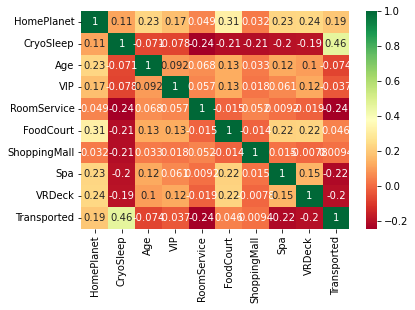

In [21]:
corr = dropped_titanic_copy.corr()
top_corr = corr.index
heatmap=sns.heatmap(dropped_titanic_copy[top_corr].corr(),annot=True,cmap="RdYlGn")

## X and Y + traintestsplit

In [22]:
X = dropped_titanic_copy[titanic_features]
y = dropped_titanic_copy.Transported
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

## Model

In [28]:
titanic_model = GradientBoostingClassifier(n_estimators=80)

titanic_model.fit(X_train, y_train)

val_predictions = titanic_model.predict(X)

X_test = titanic_data_test[titanic_features]

test_preds = titanic_model.predict(X_test)

## accuracy 

#### https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

In [29]:
print(confusion_matrix(y_valid, titanic_model.predict(X_valid)))

[[789 288]
 [164 933]]


In [30]:
print("GBC accuracy is %2.22f" % accuracy_score( 
     y_valid, titanic_model.predict(X_valid)))

GBC accuracy is 0.7920883164673413467938


In [31]:
print(accuracy_score(y_valid, titanic_model.predict(X_valid)))

0.7920883164673413


## Export

In [27]:
#sample_submission = pd.read_csv('sample_submission.csv')

#output = pd.DataFrame({'PassengerId': sample_submission.PassengerId,
#'Transported': test_preds})
#output.to_csv('titanic_10.csv', index=False)